In [11]:
import os
import sys
import numpy as np

sys.path.append('../')
from utils import load_all_fmri_for_subject
from dataset import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Test NSD Datasets

In [3]:
nsd_dataset = NSDImageDataset(plot=False,
                                nsd_path='../../StableDiffusionReconstruction/nsd',
                                sub='sub01')

print(max(nsd_dataset.idxs))

72999


In [8]:

betas_path = '../data/betas_nsd'
targets_path = '../data/target_vectors_nsd/z_zeroscope'
nsd_path = '../data/nsd'

nsd_bt_dataset = NSDBetasAndTargetsDataset( 
                 betas_path, 
                 targets_path, 
                 nsd_path=nsd_path,
                 avg_reps=False, 
                 rois=['BMDgeneral','lPPA','rPPA'],
                 subs=[1],
                 subset='both')
print("dataset len:", len(nsd_bt_dataset))
betas, targets = nsd_bt_dataset[2]
print('betas.shape',betas.shape)
print('targets.shape',targets.shape)
print('betas.max()',betas.max())
print('betas.min()',betas.min())
print('targets.max()',targets.max())
print('targets.min()',targets.min())

self.stim_idxs len for subset both 10000
dataset len: 30000
betas.shape (16640,)
targets.shape (65340,)
betas.max() 4.5055658493134985
betas.min() -3.435439457409122
targets.max() 2.246
targets.min() -2.732


## Test BMD Datasets

In [55]:

betas_path = '../data/betas_impulse'
targets_path = '../data/target_vectors/blip'

bmd_bt_dataset = BMDBetasAndTargetsDataset( 
                 betas_path, 
                 targets_path, 
                 avg_reps=False, 
                 beta_type='impulse',
                 rois=['BMDgeneral'],
                 subs=[1],
                 subset='test')

print(len(bmd_bt_dataset))

betas, targets = bmd_bt_dataset[3]
print(betas.shape, targets.shape)

print(betas.max(), betas.min(), targets.max(), targets.min())

1020
(16346,) (173568,)
3.941730546873685 -3.6130260817140742 3.1705143 -6.416951


## Test concatenating both BMD and NSD datasets

In [9]:
# concatenate both 
from torch.utils.data import ConcatDataset

concat_dataset = ConcatDataset([nsd_bt_dataset, bmd_bt_dataset])


betas, targets = bmd_bt_dataset[1000]
print(betas.shape, targets.shape)

print(betas.max(), betas.min(), targets.max(), targets.min())

IndexError: list index out of range

# Test HAD Dataset

### HadVideoDataset

Dataset length: 21600
n_frames 49  - frame shape: (100, 100, 3)


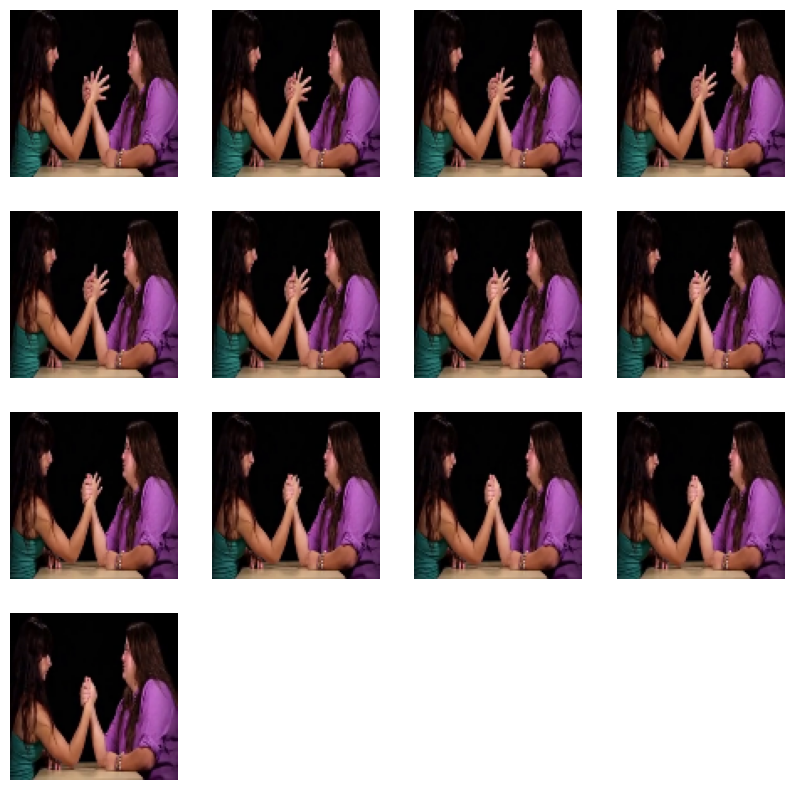

In [15]:
from dataset import HADVideoDataset
from utils import plot_video

had_path = '../data/stimuli_had/'

had_dataset = HADVideoDataset( 
                 had_path, 
                 metadata_path = '../data/metadata_had',
                 subset='all',
                 resolution=244,
                 transform=None,
                 normalize=False,
                 return_filename=False,
                 load_from_frames=False)

print('Dataset length:', len(had_dataset))

video = had_dataset[100]

print('n_frames',len(video),' - frame shape:', video[0].shape)

plot_video(video, frames_to_skip=4)


## HADBetasAndTargetsDataset

In [1]:
# Import necessary modules and classes
from dataset import HADBetasAndTargetsDataset

betas_path = '../data/betas_cifti_had'
targets_path = '../data/target_vectors_had/z_zeroscope'

# Instantiate the HADBetasAndTargetsDataset
had_bt_dataset = HADBetasAndTargetsDataset(betas_path, targets_path, avg_reps=False)

# Print the length of the dataset
print("Dataset length:", len(had_bt_dataset))

# Retrieve a sample from the dataset
betas, targets = had_bt_dataset[0]

# Print the shapes and values of the betas and targets
print("betas.shape:", betas.shape)
print("targets.shape:", targets.shape)
print("betas.max():", betas.max())
print("betas.min():", betas.min())
print("targets.max():", targets.max())
print("targets.min():", targets.min())


ModuleNotFoundError: No module named 'dataset'